# San Fransico Bay Wheels 
![image](https://techcrunch.com/wp-content/uploads/2018/01/gettyimages-866244720.jpg?w=1390&crop=1)

My first project importing and analyzing data from BigQuery on Kaggle. This will be the basis for future work, involving huge dataset from BigQuery by putting my SQL skills to work.  

Bay Wheels, formerly known as Ford GoBike have become a new form of transportation in the San Francisco area, offering benefits such as affordability, convenience, and exercise for riders. The bike share system is divided into stations around the city, users are able to unlock and return bicycles at any station once their trip is complete. 


## About the Data 
The dataset contains trip data from 2013-2018, including the following:
* **Trip ID**
* **Duration (in seconds)**
* **Subscription Type**
* **Start time**
* **End time**
* **Start Station** 
* **End Station** 
* **Latitude**
* **Longitude**


In [1]:
#Setup enviornment 
from google.cloud import bigquery 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
#Create the client object 
client = bigquery.Client()


Using Kaggle's public dataset BigQuery integration.


In [3]:
#create the reference to the dataset 
dataset_ref = client.dataset("san_francisco_bikeshare", project="bigquery-public-data")

#API request 
dataset = client.get_dataset(dataset_ref)

In [4]:
#Preview the data 
tables_list = list(client.list_tables(dataset))

#Identify the names of the tables
for i in tables_list:
    print(i.table_id)
    
#Create a refence to a table in the dataset 
table_ref = dataset_ref.table('bikeshare_regions')

#API request 
table = client.get_table(table_ref)

#Create a dataframe 
df = client.list_rows(table, max_results = 5).to_dataframe()
print(df)

#Create a reference to the remaining tables
table2_ref = dataset_ref.table('bikeshare_station_info')
table3_ref = dataset_ref.table('bikeshare_station_status')
table4_ref = dataset_ref.table('bikeshare_trips')

table_list = [table2_ref, table3_ref, table4_ref]
for i in table_list:
    table = client.get_table(i)
    #View the schema of each table to get more info about each column 
    print(table.schema)
    df = client.list_rows(table, max_results = 5).to_dataframe()
    print(df.columns)
    print(df)


bikeshare_regions
bikeshare_station_info
bikeshare_station_status
bikeshare_trips


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Cannot use bqstorage_client if max_results is set, reverting to fetching data with the tabledata.list endpoint.
  from ipykernel import kernelapp as app


   region_id           name
0          3  San Francisco
1          5       San Jose
2         12        Oakland
3         13     Emeryville
4         14       Berkeley
[SchemaField('station_id', 'INTEGER', 'REQUIRED', 'Unique identifier of a station.', (), None), SchemaField('name', 'STRING', 'REQUIRED', 'Public name of the station', (), None), SchemaField('short_name', 'STRING', 'NULLABLE', 'Short name or other type of identifier, as used by the data publisher', (), None), SchemaField('lat', 'FLOAT', 'REQUIRED', 'The latitude of station. The field value must be a valid WGS 84 latitude in decimal degrees format. See: http://en.wikipedia.org/wiki/World_Geodetic_System, https://en.wikipedia.org/wiki/Decimal_degrees', (), None), SchemaField('lon', 'FLOAT', 'REQUIRED', 'The longitude of station. The field value must be a valid WGS 84 longitude in decimal degrees format. See: http://en.wikipedia.org/wiki/World_Geodetic_System, https://en.wikipedia.org/wiki/Decimal_degrees', (), None), Schem

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Cannot use bqstorage_client if max_results is set, reverting to fetching data with the tabledata.list endpoint.


Index(['station_id', 'name', 'short_name', 'lat', 'lon', 'region_id',
       'rental_methods', 'capacity', 'external_id', 'eightd_has_key_dispenser',
       'has_kiosk', 'station_geom'],
      dtype='object')
   station_id                                               name short_name  \
0         501  Balboa Park (San Jose Ave at Sgt. John V. Youn...     SF-Y16   
1         504                       Onondaga Ave at Alemany Blvd    SF-AA17   
2         505                            Geneva Ave at Moscow St    SF-CC18   
3         544                 Allyne Park (Green St at Gough St)     SF-C21   
4         546                              13th St at Webster St    OK-L6-2   

         lat         lon  region_id         rental_methods  capacity  \
0  37.724893 -122.443238        NaN  ['KEY', 'CREDITCARD']         0   
1  37.721544 -122.438303        NaN  ['KEY', 'CREDITCARD']         0   
2  37.713193 -122.433491        NaN  ['KEY', 'CREDITCARD']         0   
3  37.797249 -122.427457    

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Cannot use bqstorage_client if max_results is set, reverting to fetching data with the tabledata.list endpoint.


Index(['station_id', 'num_bikes_available', 'num_bikes_disabled',
       'num_docks_available', 'num_docks_disabled', 'is_installed',
       'is_renting', 'is_returning', 'last_reported', 'num_ebikes_available',
       'eightd_has_available_keys'],
      dtype='object')
   station_id  num_bikes_available  num_bikes_disabled  num_docks_available  \
0          64                    0                   0                    0   
1         254                    0                  15                    0   
2         501                    0                   0                    0   
3         504                    0                   0                    0   
4         505                    0                   0                    0   

   num_docks_disabled  is_installed  is_renting  is_returning  last_reported  \
0                   0         False       False         False          86400   
1                   0          True       False          True     1639570931   
2             

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Cannot use bqstorage_client if max_results is set, reverting to fetching data with the tabledata.list endpoint.


Index(['trip_id', 'duration_sec', 'start_date', 'start_station_name',
       'start_station_id', 'end_date', 'end_station_name', 'end_station_id',
       'bike_number', 'zip_code', 'subscriber_type', 'c_subscription_type',
       'start_station_latitude', 'start_station_longitude',
       'end_station_latitude', 'end_station_longitude', 'member_birth_year',
       'member_gender', 'bike_share_for_all_trip', 'start_station_geom',
       'end_station_geom'],
      dtype='object')
                trip_id  duration_sec                start_date  \
0    472017123123383700           249 2017-12-31 23:38:37+00:00   
1   6172017123121533800           462 2017-12-31 21:53:38+00:00   
2  13372017123117451000           468 2017-12-31 17:45:10+00:00   
3   3072017123117293000           569 2017-12-31 17:29:30+00:00   
4  26262017123116565900          1362 2017-12-31 16:56:59+00:00   

       start_station_name  start_station_id                  end_date  \
0  The Alameda at Bush St               2

In [5]:
#Get an idea of how big the 'bikeshare_trips' table is 
query = """
SELECT *
FROM `bigquery-public-data.san_francisco_bikeshare.bikeshare_trips`
"""

#Create a QueryJobConfig object and set the dry_run parameter to True 
dry_run_config = bigquery.QueryJobConfig(dry_run = True)

#API request to estimate memory usage
dry_query_run = client.query(query, job_config = dry_run_config)

print("This query will process {} bytes.".format(dry_query_run.total_bytes_processed))

This query will process 407002188 bytes.


Now that I have previewed the data, I can begin to generate questions that can lead to insights about ride sharing in the city of San Francisco. And also, write my first queries to make it possible.  

General overviews of the data:
* Trip information 
* Customer information 
* Station information  

## General Questions for analysis
1. How do members and subscribers differ in usage?
2. What are the most popular start and end station pairings? 
3. Which hour in the day, and day has the high level of traffic?

# Analyze the Data 

I'll begin by writing a query to find the number of stations in San Francisco 

In [6]:
#Set a query limit of 1 gb
one_gb = 1000*1000*1000
safe_query = bigquery.QueryJobConfig(maximum_bytes_billed = one_gb)

#First query 
query1 = """
SELECT DISTINCT(station_id)
FROM `bigquery-public-data.san_francisco_bikeshare.bikeshare_station_info`
WHERE short_name LIKE 'SF%' 
"""

#run the query
query_res = client.query(query1, job_config = safe_query)

#Create a dataframe 
query_res = query_res.to_dataframe()
print(query_res)
print('There is a total of 263 stations')

/opt/conda/lib/python3.7/site-packages/google/cloud/bigquery/client.py:440: UserWarning: Cannot create BigQuery Storage client, the dependency google-cloud-bigquery-storage is not installed.
  "Cannot create BigQuery Storage client, the dependency "


     station_id
0           501
1           504
2           505
3           544
4           547
..          ...
253          15
254          50
255          66
256         527
257         412

[258 rows x 1 columns]
There is a total of 263 stations


From the 263 stations around the city, which are the most popular start and end stations? 

## Top Start and End Stations

In [7]:
#use both 'bikeshare_station_info' and 'bikeshare_trips' to find the top 10 start stations

query2 = """
SELECT start_station_id, COUNT(trip_id) as trips_n 
FROM `bigquery-public-data.san_francisco_bikeshare.bikeshare_station_info` as t1
INNER JOIN `bigquery-public-data.san_francisco_bikeshare.bikeshare_trips` as t2 
ON t1.station_id = t2.start_station_id 
WHERE short_name LIKE 'SF%' 
GROUP BY (start_station_id)
ORDER BY COUNT(trip_id) desc
LIMIT 10
"""

query_res2 = client.query(query2)

query_res2 = query_res2.to_dataframe()
print(query_res2)

#change the data type of the "start_station_id" to a string 
query_res2['start_station_id'] = query_res2['start_station_id'].astype('str')

/opt/conda/lib/python3.7/site-packages/google/cloud/bigquery/client.py:440: UserWarning: Cannot create BigQuery Storage client, the dependency google-cloud-bigquery-storage is not installed.
  "Cannot create BigQuery Storage client, the dependency "


   start_station_id  trips_n
0                70    80370
1                50    56570
2                60    46286
3                61    45166
4                74    43779
5                55    41647
6                77    39243
7                76    33035
8                64    30195
9                66    30006


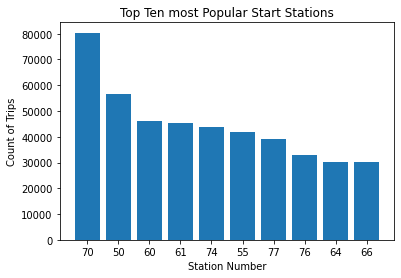

In [8]:
#Create a box plot of the ten most popular start stations 
plt.bar(query_res2.start_station_id, query_res2.trips_n)
plt.xlabel('Station Number')
plt.ylabel('Count of Trips')
plt.title('Top Ten most Popular Start Stations')
plt.xticks(query_res2['start_station_id'])
plt.show()

In [9]:
#use both 'bikeshare_station_info' and 'bikeshare_trips' to find the top 10 end stations
query3 = """
SELECT end_station_id, COUNT(trip_id) as trips_n 
FROM `bigquery-public-data.san_francisco_bikeshare.bikeshare_station_info` as t1
INNER JOIN `bigquery-public-data.san_francisco_bikeshare.bikeshare_trips` as t2 
ON t1.station_id = t2.start_station_id 
WHERE short_name LIKE 'SF%' 
GROUP BY (end_station_id)
ORDER BY COUNT(trip_id) desc
LIMIT 10
"""
query_res3 = client.query(query3)
query_res3 = query_res3.to_dataframe()
query_res3

/opt/conda/lib/python3.7/site-packages/google/cloud/bigquery/client.py:440: UserWarning: Cannot create BigQuery Storage client, the dependency google-cloud-bigquery-storage is not installed.
  "Cannot create BigQuery Storage client, the dependency "


,end_station_id,trips_n
0,70,77625
1,50,48107
2,60,45317
3,61,43402
4,67,39899
5,69,38877
6,77,36233
7,74,35497
8,30,30600
9,6,28553


In [10]:
#Change the data type of the "end_station_id" to a string 
query_res3['end_station_id'] = query_res3['end_station_id'].astype('str')
query_res3.dtypes

end_station_id    object
trips_n            int64
dtype: object

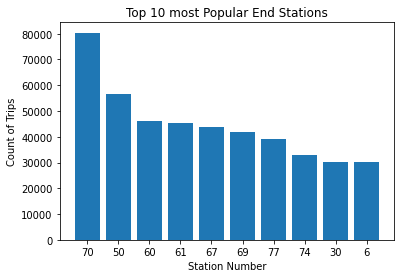

In [11]:
#Create a box plot of the ten most popular start stations 
plt.bar(query_res3.end_station_id, query_res2.trips_n)
plt.ylabel('Count of Trips')
plt.xlabel('Station Number')
plt.title('Top 10 most Popular End Stations')
plt.xticks(query_res3['end_station_id'])
plt.show()

A few of the top start and end stations appear in both dataframes, I will continue by identifying those stations to gain more insight.

In [12]:
#Finding start and end stations represented in both dataframes
merge_df = pd.merge(query_res2, query_res3, left_on='start_station_id', right_on='end_station_id', how="inner")
merge_df

,start_station_id,trips_n_x,end_station_id,trips_n_y
0,70,80370,70,77625
1,50,56570,50,48107
2,60,46286,60,45317
3,61,45166,61,43402
4,74,43779,74,35497
5,77,39243,77,36233


There are a total of 5 stations from both dataframes that are in the top 10 stations. The question that then comes to mind is, **why might these station be so popular?** My initial thoughts to the question might be due to location and routes. I will begin by looking at the top routes to draw any correlation between the top start and end stations. 

In [13]:
#Find the top routes
query11 = """
SELECT start_station_id, end_station_id, COUNT(trip_id) as trip_count
FROM `bigquery-public-data.san_francisco_bikeshare.bikeshare_station_info` as t1 
INNER JOIN `bigquery-public-data.san_francisco_bikeshare.bikeshare_trips` as t2 
ON t1.station_id = t2.start_station_id 
WHERE short_name LIKE 'SF%'
GROUP BY start_station_id, end_station_id
ORDER BY COUNT(trip_id) DESC
LIMIT 10 
"""

query11_res = client.query(query11)
query11_res = query11_res.to_dataframe()
query11_res

/opt/conda/lib/python3.7/site-packages/google/cloud/bigquery/client.py:440: UserWarning: Cannot create BigQuery Storage client, the dependency google-cloud-bigquery-storage is not installed.
  "Cannot create BigQuery Storage client, the dependency "


,start_station_id,end_station_id,trip_count
0,50,60,9162
1,61,50,7628
2,50,61,6904
3,60,74,6894
4,51,70,6351
5,70,50,6216
6,74,61,6078
7,74,70,6058
8,55,70,5843
9,15,6,5543


## Customers and Subscribers 

A number of options are available to riders, ranging from single rides to an annual subscription. The current pricing for the options are:
* Single rides start at $3 per trip

* Day passes start at $10 per day 

* Memberships are $25 per month, or $159 per year 

Riders are labeled as a **Subscriber** if they purchase an annual or 30-day plan, whereas riders who purchase single rides or day passes are known as **Customers**.

The future success of Bay Wheels could be the conversion of customer to subscribers, making it even more important to understand how customers and subscribers differ on the platform. From this analysis a promotion plan can then be made to incentivize customers on becoming subscribers to the platform. 


In [14]:
#Count the number customer and subscribers 
query4 = """
SELECT subscriber_type, COUNT(subscriber_type) as num_total
FROM `bigquery-public-data.san_francisco_bikeshare.bikeshare_trips`
GROUP BY subscriber_type
"""
query_res4 = client.query(query4)
query_res4 = query_res4.to_dataframe()
query_res4

/opt/conda/lib/python3.7/site-packages/google/cloud/bigquery/client.py:440: UserWarning: Cannot create BigQuery Storage client, the dependency google-cloud-bigquery-storage is not installed.
  "Cannot create BigQuery Storage client, the dependency "


,subscriber_type,num_total
0,Subscriber,1635448
1,Customer,311971


Unfortunately, I am not able to get the number of individual customer and subscribers due to what I believe is privacy reasons. But, I am able to get the number of rides for both customers and subscribers. 

Subscribers have **5x** the number of rides compared to customers on the platform. My hypothesis is that subscriber use the bicycles as a means of commute, while subscribers may use the bicycles for leisure activities. Further insights between Subscribers and Customers will also be analyzed below in the **Activity** segment. 


## Activity
Bicycles are available 24 hours a day, 365 days a year for riders. Understanding what time of day, which day of the week, and month of year is the busiest will help further my analysis. 

In [15]:
#Identify the busiest time of day 
query5 = """
SELECT extract(HOUR FROM start_date) as hour, COUNT(trip_id) as trip_count
FROM `bigquery-public-data.san_francisco_bikeshare.bikeshare_trips`
GROUP BY hour
ORDER BY hour 
"""

query_res5 = client.query(query5)
query_res5 = query_res5.to_dataframe()

#Create a list to change the hour column 
hour_list = ['12 am', '1 am', '2 am','3 am','4 am','5 am','6 am','7 am', '8 am', '9 am', '10 am', '11 am', '12 pm', '1 pm', '2 pm','3 pm','4 pm','5 pm','6 pm','7 pm', '8 pm', '9 pm', '10 pm', '11 pm']

#Replace the values in the column with the values in the list 
query_res5['hour'] = hour_list
print(query_res5)

/opt/conda/lib/python3.7/site-packages/google/cloud/bigquery/client.py:440: UserWarning: Cannot create BigQuery Storage client, the dependency google-cloud-bigquery-storage is not installed.
  "Cannot create BigQuery Storage client, the dependency "


     hour  trip_count
0   12 am        7768
1    1 am        4094
2    2 am        2432
3    3 am        1422
4    4 am        2672
5    5 am        9243
6    6 am       37486
7    7 am      118565
8    8 am      240965
9    9 am      181953
10  10 am       89070
11  11 am       83738
12  12 pm       96141
13   1 pm       92164
14   2 pm       82819
15   3 pm       99094
16   4 pm      164285
17   5 pm      239801
18   6 pm      171136
19   7 pm       91170
20   8 pm       53738
21   9 pm       37508
22  10 pm       25105
23  11 pm       15050


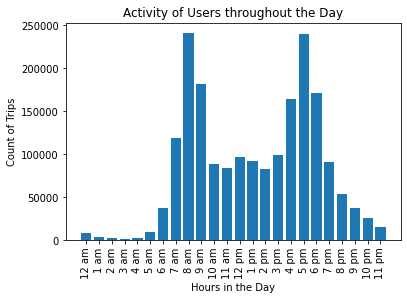

In [16]:
#Plot the dataframe as a bar graph 

plt.bar(query_res5.hour, query_res5.trip_count)
plt.ylabel('Count of Trips')
plt.xlabel('Hours in the Day')
plt.title('Activity of Users throughout the Day')
plt.xticks(rotation = 90)
plt.show()

The distribution represents a **bimodal shape.** The peak hours are 8 am and 5 pm as shown in the graph, which may be the result of riders communiting to work or school in the morning and evening. Further analysis will be needed to uncover any correlations within the data.

In [17]:
#Identify the difference between Subscribers and customers count during the day
query8 = """
SELECT extract(HOUR FROM start_date) as hour, subscriber_type, COUNT(*) as count
FROM `bigquery-public-data.san_francisco_bikeshare.bikeshare_trips`
GROUP BY hour, subscriber_type
ORDER BY hour 
"""

query8_res = client.query(query8)
query8_res = query8_res.to_dataframe() 

#Create a list to change the hour column 
hour_list2 = ['12 am', '12 am', '1 am', '1 am', '2 am', '2 am','3 am', '3 am','4 am', '4 am','5 am', '5 am','6 am', '6 am','7 am', '7 am', '8 am', '8 am','9 am', '9 am', '10 am', '10 am', '11 am', '11 am', '12 pm', '12 pm', '1 pm','1 pm', '2 pm','2 pm','3 pm','3 pm','4 pm','4 pm','5 pm','5 pm','6 pm','6 pm','7 pm','7 pm', '8 pm','8 pm', '9 pm','9 pm', '10 pm','10 pm', '11 pm', '11 pm']

#Change the hour column 
query8_res['hour'] = hour_list2
print(query8_res.head())
query8_res.dtypes 

/opt/conda/lib/python3.7/site-packages/google/cloud/bigquery/client.py:440: UserWarning: Cannot create BigQuery Storage client, the dependency google-cloud-bigquery-storage is not installed.
  "Cannot create BigQuery Storage client, the dependency "


    hour subscriber_type  count
0  12 am      Subscriber   5722
1  12 am        Customer   2046
2   1 am      Subscriber   2713
3   1 am        Customer   1381
4   2 am      Subscriber   1464


hour               object
subscriber_type    object
count               int64
dtype: object

[]

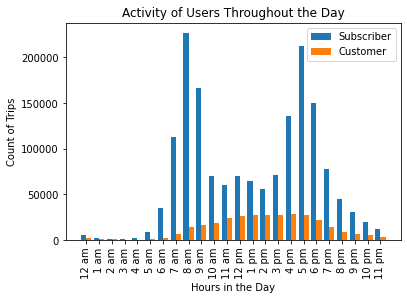

In [18]:
#filter for subscribers and customers into individual dataframes 
df1 = query8_res[query8_res['subscriber_type'] == 'Subscriber']
df2 = query8_res[query8_res['subscriber_type'] == 'Customer']


#Create the x-axis - the np.arange() function from numpy library is used to create a range of values 
x_axis = np.arange(len(hour_list))

#To avoid overlapping of bars in each group, the bars are shifted -0.2 units and +0.2 units from the x-axis 
#The width of the bars of each graph is set 0.4 units 
plt.bar(x_axis - 0.2,  df1['count'], 0.4, label="Subscriber")
plt.bar(x_axis + 0.2, df2['count'], 0.4, label="Customer")
plt.xticks(x_axis, hour_list, rotation = 90)
plt.xlabel('Hours in the Day')
plt.ylabel('Count of Trips')
plt.title('Activity of Users Throughout the Day')
plt.legend()
plt.plot()

The shape of the distribution of the number of rides for both, subscribers and customers are completely different. The number of rides throughout the day for subscribers is vastly greater than that of customers. The peak hours for customers appears to be in the **afternoon**, between 1 to 5 pm. My hypothesis is that both subscribers and customers, partake in different activities throughout the day. 

/opt/conda/lib/python3.7/site-packages/google/cloud/bigquery/client.py:440: UserWarning: Cannot create BigQuery Storage client, the dependency google-cloud-bigquery-storage is not installed.
  "Cannot create BigQuery Storage client, the dependency "


   day  trip_count
0    1      132374
1    2      322673
2    3      349190
3    4      345075
4    5      335488
5    6      309472
6    7      153147


[]

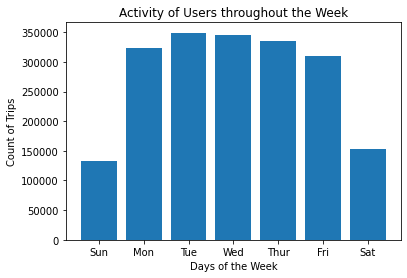

In [19]:
#Identify the busiest day's of the week 
query6 = """
SELECT extract(DAYOFWEEK FROM start_date) as day, COUNT(trip_id) as trip_count
FROM `bigquery-public-data.san_francisco_bikeshare.bikeshare_trips`
GROUP BY day
ORDER BY day 
"""
#DAYOFWEEK: Returns values in the range [1, 7] with Sunday as the first day of the week 

query6_res = client.query(query6)
query6_res = query6_res.to_dataframe()
print(query6_res)

#Create list of days in a week to create the x_axis 
day_list = ['Sun', 'Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat']
query6_res['day'] = day_list

#plot the bar graph 
plt.bar(query6_res['day'], query6_res['trip_count'])
plt.xlabel('Days of the Week')
plt.ylabel('Count of Trips')
plt.title('Activity of Users throughout the Week')
plt.plot()

The busiest day's of the week appear to be during the **weekday**, and not the **weekend**. Further analysis will be needed to uncover why this is true, and not the opposite for bike sharing. 

In [20]:
#Identify the difference between Subscribers and customers count throughout the week
query9 = """
SELECT extract(DAYOFWEEK FROM start_date) as day, subscriber_type, COUNT(*) as count
FROM `bigquery-public-data.san_francisco_bikeshare.bikeshare_trips`
GROUP BY day, subscriber_type
ORDER BY day
"""

query9_res = client.query(query9)
query9_res = query9_res.to_dataframe()
print(query9_res)

#Filter the dataframe into subscribers and customers 
df_s = query9_res[query9_res['subscriber_type'] == 'Subscriber']
df_c = query9_res[query9_res['subscriber_type'] == 'Customer']

/opt/conda/lib/python3.7/site-packages/google/cloud/bigquery/client.py:440: UserWarning: Cannot create BigQuery Storage client, the dependency google-cloud-bigquery-storage is not installed.
  "Cannot create BigQuery Storage client, the dependency "


    day subscriber_type   count
0     1      Subscriber   75097
1     1        Customer   57277
2     2        Customer   36127
3     2      Subscriber  286546
4     3      Subscriber  314381
5     3        Customer   34809
6     4      Subscriber  309479
7     4        Customer   35596
8     5        Customer   37842
9     5      Subscriber  297646
10    6      Subscriber  264392
11    6        Customer   45080
12    7      Subscriber   87907
13    7        Customer   65240


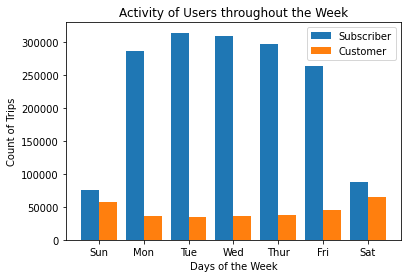

In [21]:
#Create a bar plot representing both subscriber and customer counts throughout the week

#Create list of days in a week to create the x_axis 
day_list = ['Sun', 'Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat']

#create the x_axis 
x_axis2 = np.arange(len(day_list))

#plot the bar graph 
plt.bar(x_axis2 - 0.2,  df_s['count'], 0.4, label="Subscriber")
plt.bar(x_axis2 + 0.2,  df_c['count'], 0.4, label="Customer")
plt.xticks(x_axis2, day_list)
plt.xlabel('Days of the Week')
plt.ylabel('Count of Trips')
plt.title('Activity of Users throughout the Week')
plt.legend()
plt.show()

The number of total rides throughout the **weekday** between subscribers and customers has the greatest numbers of disproportion. While the number of riders for subscribers on the weekend drops drastically drops, the difference between subscribers and customers becomes more proportional. 

/opt/conda/lib/python3.7/site-packages/google/cloud/bigquery/client.py:440: UserWarning: Cannot create BigQuery Storage client, the dependency google-cloud-bigquery-storage is not installed.
  "Cannot create BigQuery Storage client, the dependency "


   month  trip_count
0    Jan      166590
1    Feb      176703
2    Mar      193159
3    Apr      215365
4    May       86364
5    Jun       94361
6    Jul      133612
7    Aug      178868
8    Sep      185879
9    Oct      203315
10   Nov      168703
11   Dec      144500


[]

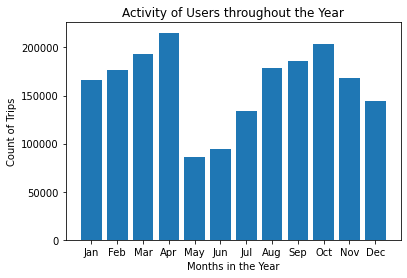

In [22]:
#Identify the busiest months of the year 
query7 = """
SELECT extract(MONTH FROM start_date) as month, COUNT(trip_id) as trip_count
FROM `bigquery-public-data.san_francisco_bikeshare.bikeshare_trips`
GROUP BY month
ORDER BY month
"""

query7_res = client.query(query7)
query7_res = query7_res.to_dataframe()

#Change the month column from int to string 
month_list = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
query7_res['month'] = month_list
print(query7_res)

#Create the bar plot 
plt.bar(query7_res['month'], query7_res['trip_count'])
plt.xlabel('Months in the Year')
plt.ylabel('Count of Trips')
plt.title('Activity of Users throughout the Year')
plt.plot()

The busiest months of the year appear to be during **April** and **October**, which are during two completely different seasons. But, the busiest season appears to be during autumn (August, September, and October). It's also worth noting that San Francisco is located in northern California, where the summers are long, confortable, and the winters are short, and partial cloudy. And according to the **Tourism Score**, based on this [article](https://weatherspark.com/y/557/Average-Weather-in-San-Francisco-California-United-States-Year-Round#Sections-BestTime), the best time to visit San Francisco for warm-weather activities is from **late June** to **early October.**  The autumn season falls within this time frame, but additional analysis will be needed to understand the relationship between bike sharing and warm weather in greater detail. 

In [23]:
#identify the difference in activity between customers and subscribers throughout the year 

query10 = """
SELECT extract(MONTH FROM start_date) as month, subscriber_type, COUNT(*) as count
FROM `bigquery-public-data.san_francisco_bikeshare.bikeshare_trips`
GROUP BY month, subscriber_type
ORDER BY month 
"""

query10_res = client.query(query10)
query10_res = query10_res.to_dataframe()
print(query10_res.head())

#Filter the dataframe for subscribers and customers
df_s2 = query10_res[query10_res['subscriber_type'] == "Subscriber"]
df_c2 = query10_res[query10_res['subscriber_type'] == "Customer"]


/opt/conda/lib/python3.7/site-packages/google/cloud/bigquery/client.py:440: UserWarning: Cannot create BigQuery Storage client, the dependency google-cloud-bigquery-storage is not installed.
  "Cannot create BigQuery Storage client, the dependency "


   month subscriber_type   count
0      1      Subscriber  146533
1      1        Customer   20057
2      2      Subscriber  153980
3      2        Customer   22723
4      3        Customer   26465


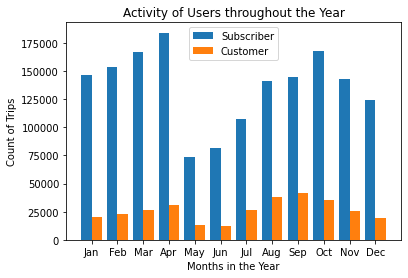

In [24]:
#Create a bar plot representing subscriber and customer activity throughout the year 

#Create the x-axis 
x_axis3 = np.arange(len(month_list))

#plot the bar graph 
plt.bar(x_axis3 - 0.2,  df_s2['count'], 0.4, label="Subscriber")
plt.bar(x_axis3 + 0.2,  df_c2['count'], 0.4, label="Customer")
plt.xticks(x_axis3, month_list)
plt.xlabel('Months in the Year')
plt.ylabel('Count of Trips')
plt.title('Activity of Users throughout the Year')
plt.legend()
plt.show()

There is a large disproportion in the number of rides between Subscribers and Customers throughout the year. While these numbers may be disproportion, the distribution of rides throughout the year for both Subscribers and Customers follows a similar shape. The busiest season of the year for both Subscribers and Customers appears to be **autumn**, as noted in the section above for all users. 

# Conclusion and Final Thoughts 


* The disproportion in the number of rides between subscribers and customers is high, with subscribers greater than customers. 
* The shape of the distribution in the number of rides between subscribers and customers thoughout the day is completely different. 
* The busiest time for bike sharing in the San Francisco region is during **autumn**

Thank you for taking the time to view my initial analysis on bike sharing with BigQuery! I will continue to update this project with additional queries and insights within the coming days/weeks, showcasing better data-driven visualizations and insights. This project was ment as an introduction to working with BigQuery to analyze a dataset, hopefully I was able to provide a level of insight on how to complete the analysis process.  

# Tableau Dashboard 

If you have the opportunity, please check out the dashboard I created for this analysis [LINK](https://public.tableau.com/app/profile/adrian.gonzalez8681/viz/SanFranciscoBikeSharingDashboard/Dashboard1)

# Feedback 

I would appreciate any feedback, or upvotes as a new data enthusiast if you found the analysis helpful. 